# **Handwritten Digit Recognition(MNIST dataset) -- Intro Neural Network**

In [ ]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt

## **Step 1: import data by dataloader in batch**


*   train_data = 60000 images
*   test_data = 10000 images


In [ ]:
#import dataset
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
print("number of image in train_data:{} | no. of image in test_data: {}\n".format(len(train_data), len(test_data)))

#mini batch(each batch contain 60 images)
batch_size = 60 #each batch contain 60 images
trainset = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)



## **Step 2: Knowning the dataset**

### How many image in each training batch?

In [ ]:
dataiter = iter(trainset)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

Finding:

There are 60 images in each batch, each image dimension is 28*28 pixels

There are 60 labels in each batch

### Show the image in the training set

In [ ]:
plt.imshow(images[3].numpy().squeeze(), cmap='gray_r');

In [ ]:
 torch.set_printoptions(linewidth=300)
 print(images[3])
 

In [ ]:
figure = plt.figure()
num_of_images = 20
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## **Step 3: Build the Neural Network**

### Define class for the model

In [ ]:
#define modle class
class MLP_Net (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784) #flatten the data from(n,1,28,28) -> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = self.l5(x)  
        return(x)

### Define loss and optimizer function, by using pytorch API

In [ ]:
model = MLP_Net()

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

### Define training loop

In [ ]:
def training_loop(n_epoch):
    for epoch in range(n_epoch):
        for batch_idx, (data, target) in enumerate(trainset):
            #print(data.shape)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 10 == 0:
                print('Train Epoch: {} | Batch_idx: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                    epoch, batch_idx,  batch_idx * len(data), len(train_data),
                    100. * batch_idx*len(data) / len(train_data), loss.item()))


## **Step 4: Train the model**

In [ ]:
n_epoch =3
training_loop(n_epoch)

## **Step 5: Predict value by using the trained model**

In [ ]:
i=1003

#image data
image = test_data[i][0]

#do prediction:
p = model(image.view(-1, 28*28))

print('\npredict result is :\n', p)
print ('\npredict value is : ', torch.argmax(p))
print('\nThe  label of of the image is: {} \n'.format(test_data[i][1]))
plt.imshow(image.numpy()[0], cmap='gray')


## **Step 6: Calculate the Model Accuracy**

In [ ]:
def cal_accuracy():
  total_count=0
  correct_count =0
  for image,label in test_data:
    p = model(image.view(-1, 28*28))
    pred_value = torch.argmax(p)
    if (pred_value == label):
      correct_count +=1 
    total_count+=1
  print("Total= {0}, Correct = {1}".format(total_count, correct_count))
  print("Accuracy ={0}".format(correct_count/total_count))

cal_accuracy()

## **Appendix 1: Whole code to the Model building and training**

**Appendix 1.1 Building model and training model**

In [12]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt

#import dataset
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
print("number of image in train_data:{} | no. of image in test_data: {}\n".format(len(train_data), len(test_data)))

#mini batch(each batch contain 60 images)
batch_size = 60 #each batch contain 60 images
trainset = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

#define modle class
class MLP_Net (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 520)
        self.l2 = nn.Linear(520, 320)
        self.l3 = nn.Linear(320, 240)
        self.l4 = nn.Linear(240, 120)
        self.l5 = nn.Linear(120, 10)

    def forward(self, x):
        x = x.view(-1, 784) #flatten the data from(n,1,28,28) -> (n, 784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = self.l5(x)  
        return(x)

#make an instance of the model
model = MLP_Net()

# define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

def training_loop(n_epoch):
    for epoch in range(n_epoch):
        for batch_idx, (data, target) in enumerate(trainset):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
              print('Train Epoch: {} | Batch_idx: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                    epoch, batch_idx,  batch_idx * len(data), len(train_data),
                    100. * batch_idx*len(data) / len(train_data), loss.item()))


   

number of image in train_data:60000 | no. of image in test_data: 10000



**Appendix 1.1 Model training**

In [10]:
#Model training
n_epoch =3
training_loop(n_epoch)


Train Epoch: 0 | Batch_idx: 0 | Batch Status: 0/60000 (0%) | Loss: 2.305997
Train Epoch: 0 | Batch_idx: 100 | Batch Status: 6000/60000 (10%) | Loss: 2.295703
Train Epoch: 0 | Batch_idx: 200 | Batch Status: 12000/60000 (20%) | Loss: 2.300183
Train Epoch: 0 | Batch_idx: 300 | Batch Status: 18000/60000 (30%) | Loss: 2.284393
Train Epoch: 0 | Batch_idx: 400 | Batch Status: 24000/60000 (40%) | Loss: 2.293286
Train Epoch: 0 | Batch_idx: 500 | Batch Status: 30000/60000 (50%) | Loss: 2.278712
Train Epoch: 0 | Batch_idx: 600 | Batch Status: 36000/60000 (60%) | Loss: 2.255322
Train Epoch: 0 | Batch_idx: 700 | Batch Status: 42000/60000 (70%) | Loss: 2.242053
Train Epoch: 0 | Batch_idx: 800 | Batch Status: 48000/60000 (80%) | Loss: 2.129200
Train Epoch: 0 | Batch_idx: 900 | Batch Status: 54000/60000 (90%) | Loss: 1.787087
Train Epoch: 1 | Batch_idx: 0 | Batch Status: 0/60000 (0%) | Loss: 1.541230
Train Epoch: 1 | Batch_idx: 100 | Batch Status: 6000/60000 (10%) | Loss: 1.015083
Train Epoch: 1 | Bat

**Appendix 1.2 Prediction base on trained model**


predict result is :
 tensor([[-0.0615, -0.0463, -0.0493,  0.0115,  0.0244, -0.0397,  0.0667,  0.0695,
          0.0151,  0.0681]], grad_fn=<AddmmBackward>)

predict value is :  tensor(7)

The  label of of the image is: 5 



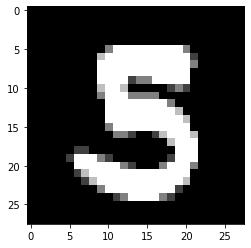

In [13]:
i=1003
image = test_data[i][0]

#do prediction:
p = model(image.view(-1, 28*28))
print('\npredict result is :\n', p)
print ('\npredict value is : ', torch.argmax(p))
print('\nThe  label of of the image is: {} \n'.format(test_data[i][1]))
plt.imshow(image.numpy()[0], cmap='gray')                

## **Appendix 2: Save Model to disk and use saved_model to predict**

In [ ]:
#save trained module to disk
torch.save(model, 'data/my_mnist_model.pt') 

#load trained module
load_model = torch.load('data/my_mnist_model.pt')
load_model.eval()

In [ ]:
#do prediction
with torch.no_grad():
  i=12
  image = test_data[i][0]
  p = load_model(image.view(-1, 28*28))
  #print('\npredict result is :\n', p)
  print ("predict value ={0} , label of the image = {1}".format(torch.argmax(p), test_data[i][1]))
  plt.imshow(image.numpy()[0], cmap='gray') 


ref: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627